In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines (1).csv


In [5]:
data = pd.read_csv("gas_turbines.csv")

In [6]:
data[:3]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468


In [7]:
data.shape

(15039, 11)

In [8]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [10]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX



Check the distribution and outliers

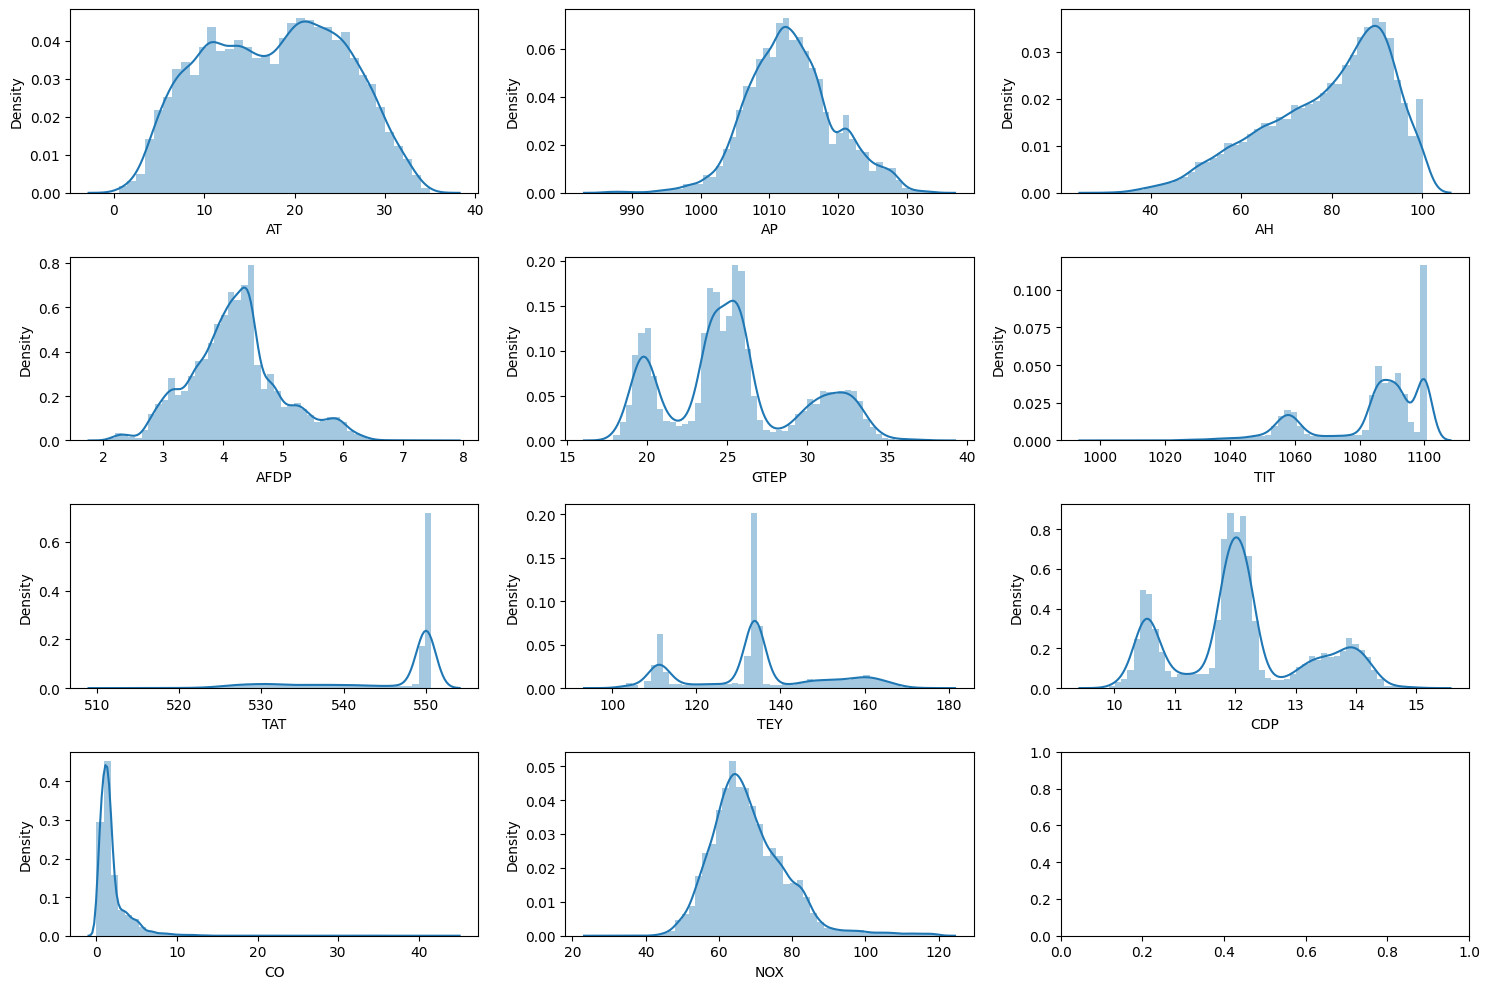

In [11]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0])
sns.distplot(data.AP, ax=ax[0,1])
sns.distplot(data.AH, ax=ax[0,2])
sns.distplot(data.AFDP, ax=ax[1,0])
sns.distplot(data.GTEP, ax=ax[1,1])
sns.distplot(data.TIT, ax=ax[1,2])
sns.distplot(data.TAT, ax=ax[2,0])
sns.distplot(data.TEY, ax=ax[2,1])
sns.distplot(data.CDP, ax=ax[2,2])
sns.distplot(data.CO, ax=ax[3,0])
sns.distplot(data.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

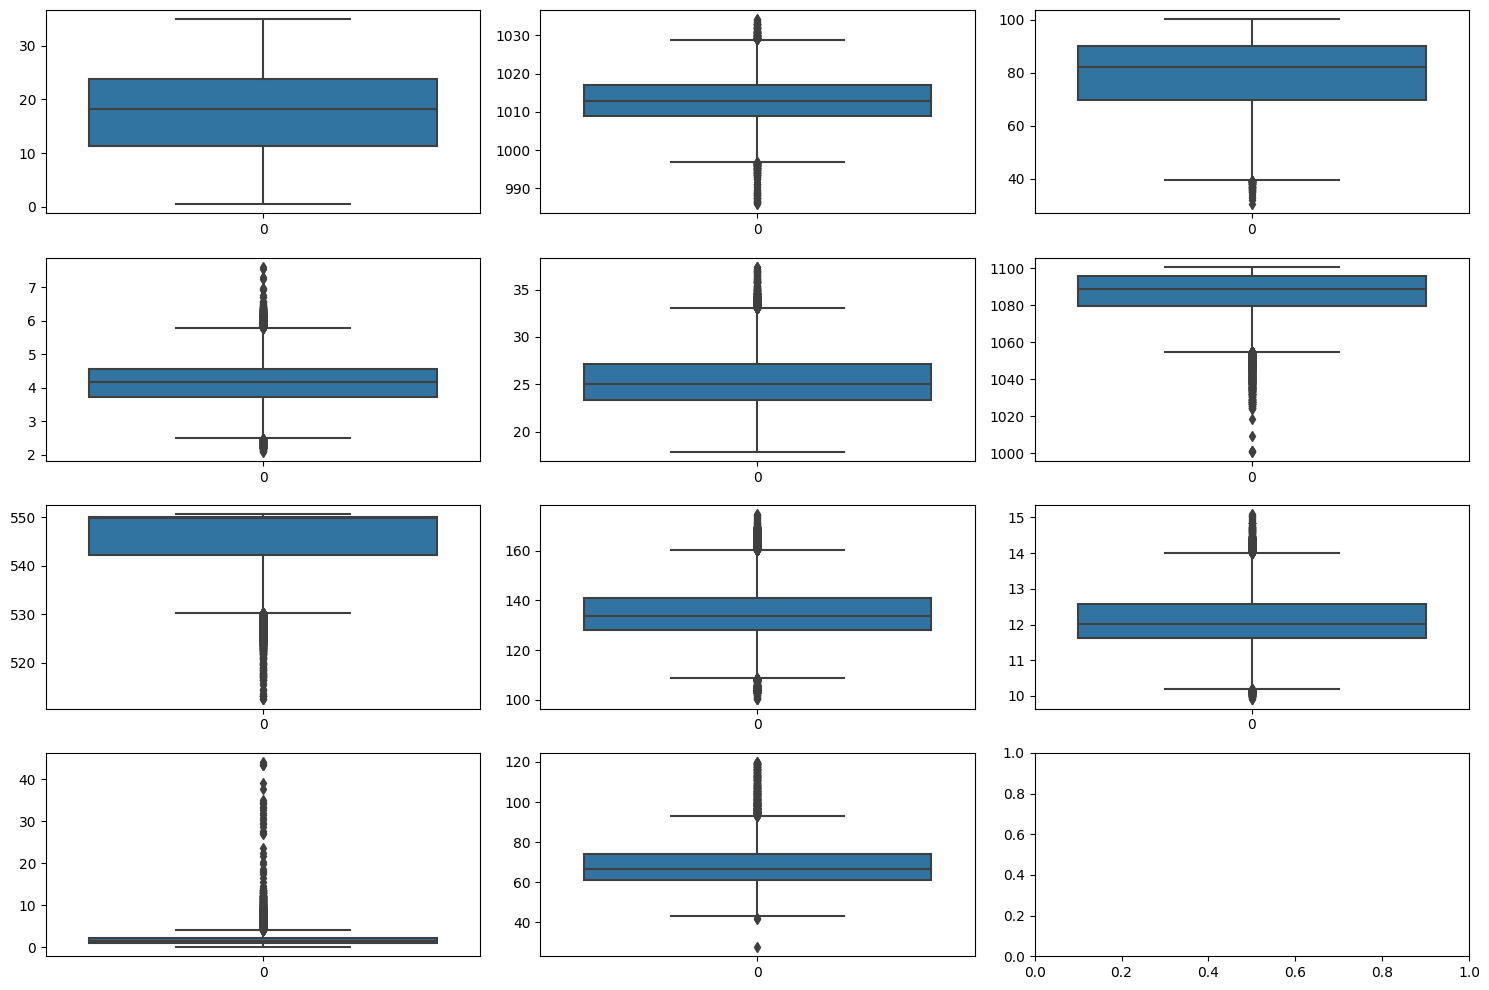

In [12]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(data.AT, ax=ax[0,0])
sns.boxplot(data.AP, ax=ax[0,1])
sns.boxplot(data.AH, ax=ax[0,2])
sns.boxplot(data.AFDP, ax=ax[1,0])
sns.boxplot(data.GTEP, ax=ax[1,1])
sns.boxplot(data.TIT, ax=ax[1,2])
sns.boxplot(data.TAT, ax=ax[2,0])
sns.boxplot(data.TEY, ax=ax[2,1])
sns.boxplot(data.CDP, ax=ax[2,2])
sns.boxplot(data.CO, ax=ax[3,0])
sns.boxplot(data.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data1 = pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


Extracting the independent and dependent variables


In [14]:
X = data1.drop(axis=0,columns="TEY").values
Y = data1["TEY"].values

In [15]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [16]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [17]:
seed = 7
np.random.seed(seed)

Creating Model

In [18]:
model = Sequential()
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [19]:
model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.0355 - accuracy: 9.9246e-05 - val_loss: 5.2328e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 4s 4ms/step - loss: 4.8234e-04 - accuracy: 9.9246e-05 - val_loss: 2.7316e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 3s 3ms/step - loss: 2.2984e-04 - accuracy: 9.9246e-05 - val_loss: 1.9613e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.6597e-04 - accuracy: 9.9246e-05 - val_loss: 1.5536e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.4575e-04 - accuracy: 9.9246e-05 - val_loss: 1.3007e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.3182e-04 - accuracy: 9.9246e-05 - val_loss: 1.3262e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===============

In [21]:
scores = model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: 9.8448e-05 - accuracy: 1.3299e-04
accuracy: 0.01%


In [22]:
history = model.fit(X,Y, validation_split = 0.33, epochs=100, batch_size = 10)

Epoch 1/100
1008/1008 [==============================] - 3s 3ms/step - loss: 9.9578e-05 - accuracy: 9.9246e-05 - val_loss: 9.8461e-05 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.0119e-04 - accuracy: 9.9246e-05 - val_loss: 9.6042e-05 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.0185e-04 - accuracy: 9.9246e-05 - val_loss: 9.4398e-05 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 3s 3ms/step - loss: 9.9998e-05 - accuracy: 9.9246e-05 - val_loss: 1.1572e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 3s 3ms/step - loss: 9.9657e-05 - accuracy: 9.9246e-05 - val_loss: 9.7833e-05 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.0032e-04 - accuracy: 9.9246e-05 - val_loss: 9.6025e-05 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===========

In [23]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

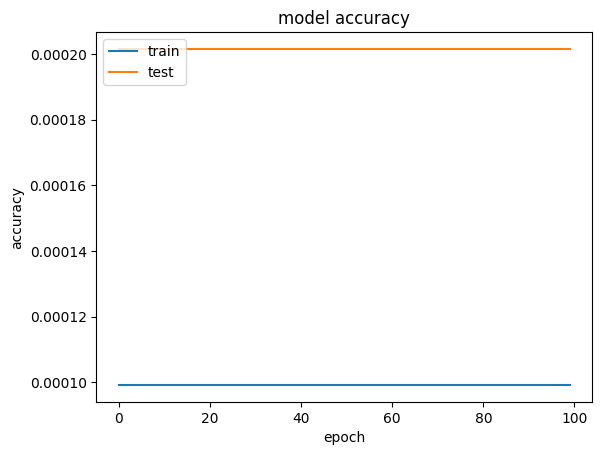

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

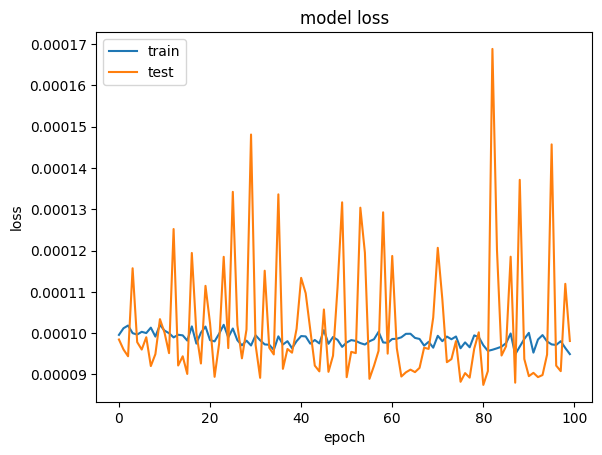

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [1]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

    adam = Adam(lr = 0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

batch_size = [10,20,40]
epochs = [10,50,100]

param_grid = dict(batch_size = batch_size, epochs = epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(X,Y)